In [2]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1 # 단어마다 고유한 인덱스를 할당한다. 인덱스 0은 사용하지 않는다.

max_length = 10 # 샘플을 벡터로 변환한다. 각 샘플에서 max_length가지 단어만 사용한다.

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1)) # 결과를 저장할 배열
for  i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.


In [3]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [7]:
import string 

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50 
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 가장 빈도가 높은 1000개의 단어만 선택하도록 Tokenizer 객체를 만든다.
tokenizer.fit_on_texts(samples) # 단어 인덱스 구축
sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환한다. 

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') # 직접 원-핫 이진 벡터 표현을 얻을 수 있다.

word_index = tokenizer.word_index # 계산된 단어 인덱스를 구한다
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print(word_index)

9개의 고유한 토큰을 찾았습니다.
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [13]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality # 단어를 해싱하여 0과 1000사이의 랜덤한 정수 인덱스로 변환한다.
        results[i, j, index] = 1

In [14]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

In [16]:
# Embedding 층에 사용할 IMDB 데이터 로드하기 
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 20 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용한다.)

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features # 정수 리스트로 데이터를 로드한다.
) 

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen)

# IMDB 데이터에 Embedding 층과 분류기 사용하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정한다.
# Embedding 층의 출력 크기는 (samples, maxlen, 8)이 된다.

model.add(Flatten()) # 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼친다.

model.add(Dense(1, activation='sigmoid')) # 분류기 추가
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
625/625 [==============================] - 7s 9ms/step - loss: 0.6852 - accuracy: 0.5625 - val_loss: 0.6121 - val_accuracy: 0.6960
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5573 - accuracy: 0.7521 - val_loss: 0.5208 - val_accuracy: 0.7364
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.4642 - accuracy: 

In [2]:
import os

imdb_dir = '../datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버린다.
training_samples = 200 # 훈련 샘플
validation_samples = 10000 # 검증 샘플
max_words = 10000 # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다
데이터 텐서의 크기 (25000, 100)
레이블 텐서의 크기: (25000,)


In [7]:
glove_dir = '../datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [8]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0이 된다.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=((x_val, y_val)))
model.save_weights('./pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 3s 332ms/step - loss: 2.8769 - accuracy: 0.4591 - val_loss: 0.6923 - val_accuracy: 0.5399
Epoch 2/10
7/7 [==============================] - 2s 300ms/step - loss: 0.4785 - accuracy: 0.7885 - val_loss: 0.9188 - val_accuracy: 0.4984
Epoch 3/10
7/7 [==============================] - 2s 300ms/step - loss: 0.4094 - accuracy: 0.8267 - val_loss: 0.6920 - val_accuracy: 0.5595
Epoch 4/10
7/7 [==============================] - 2s 297ms/step - loss: 0.2851 - accuracy: 0.9224 - val_loss: 0.9372 - val_accuracy: 0.5075
Epoch 5/10
7/7 [==============================] - 2s 292ms/step - loss: 0.2408 - accuracy: 0.9297 - val_loss: 0.6899 - val_accuracy: 0.5753
Epoch 6/10
7/7 [==============================] - 2s 283ms/step - loss: 0.2039 - accuracy: 0.9447 - val_loss: 0.7514 - val_accuracy: 0.5452
Epoch 7/10
7/7 [==============================] - 2s 296ms/step - loss: 0.1112 - accuracy: 1.0000 - val_loss: 0.7641 - val_accuracy: 0.5636
Epoch 8/10
7/7 [====

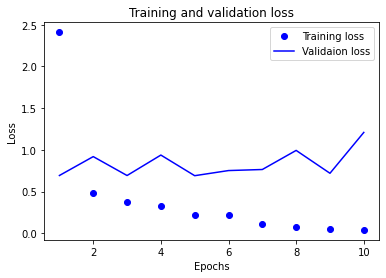

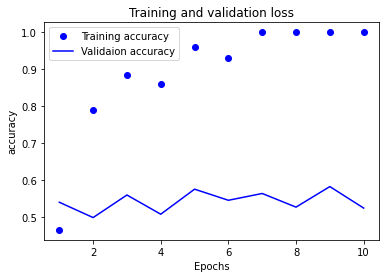

In [16]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validaion accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()